# Desenvolvimento do modelo de Aprendizado de Máquina para a verificação da relação entre gêneros músicais e transtornos mentais

## Importação das bibliotecas

In [307]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import janitor as jn
from sklearn.impute import SimpleImputer

## Importação dos dados

In [308]:
ROOT_FILE = Path.cwd().parent
DATA_FILE = ROOT_FILE / 'base_de_dados'/'mxmh_survey_results.csv'
df_original = pd.read_csv(DATA_FILE)
df = df_original.copy()

## Análise exploratória dos dados

Text(0.5, 1.0, 'Valores Nulos por Coluna')

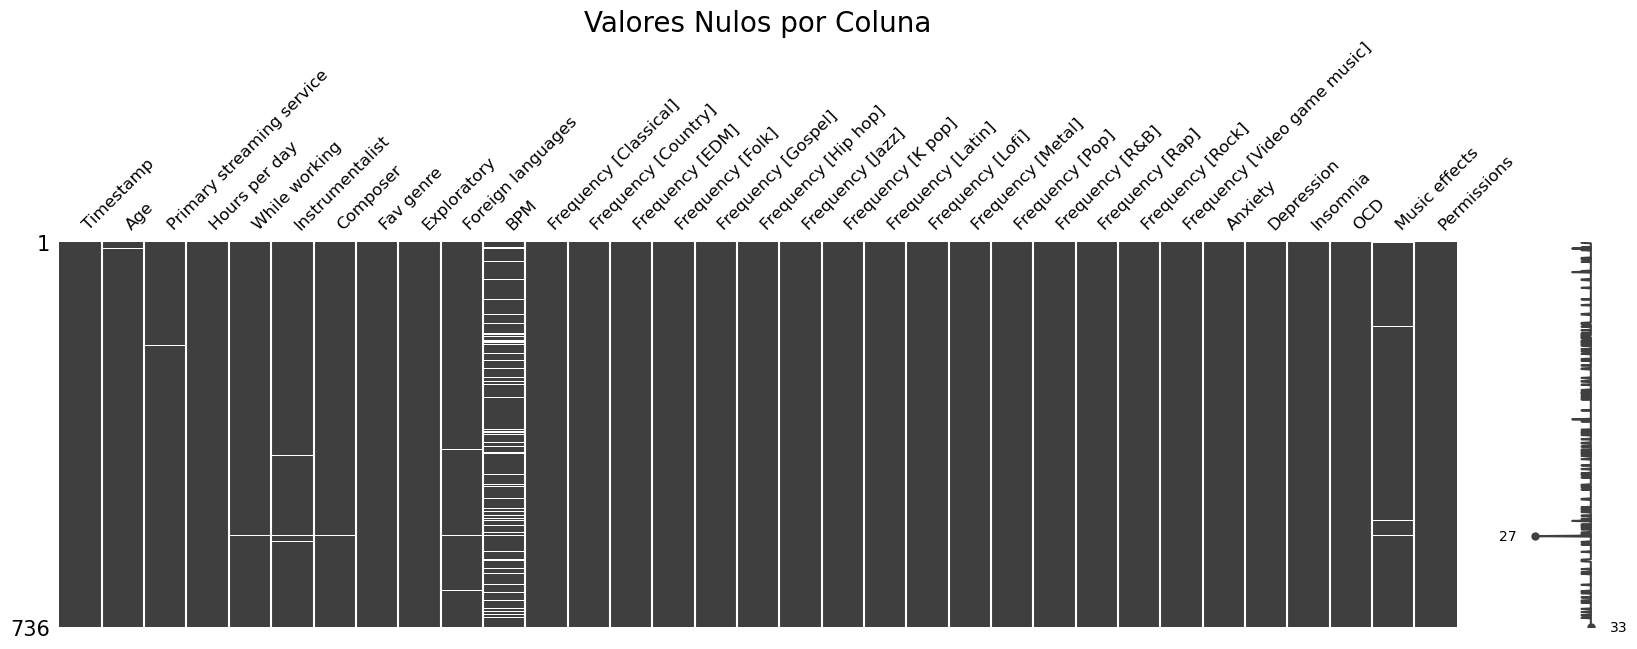

In [309]:
ax = msno.matrix(df, figsize=(20,5), fontsize=12)
ax.set_title("Valores Nulos por Coluna", fontsize=20)

Text(0.5, 1.0, 'Valores Nulos por Coluna')

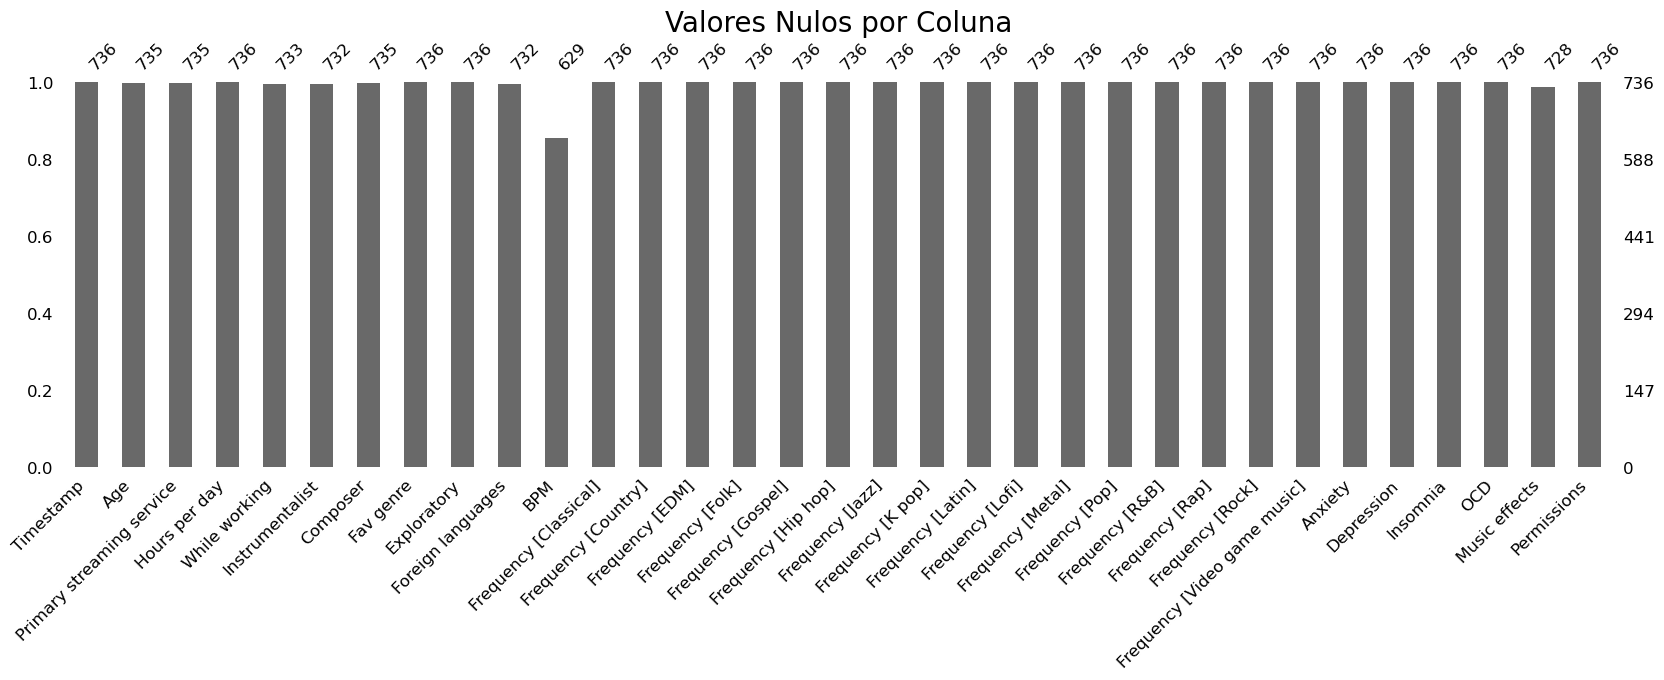

In [310]:
ax = msno.bar(df, figsize=(20,5), fontsize=12)
ax.set_title("Valores Nulos por Coluna", fontsize=20)

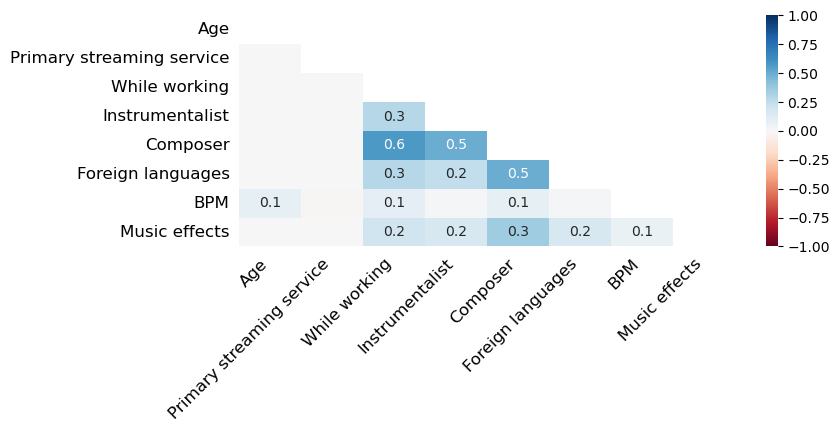

In [311]:
ax = msno.heatmap(df, figsize=(8,3), fontsize=12)

### Tratamento dos dados faltantes

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

age = ok
primary streaming service = ok
while working = ok
instrumentalist = ok
composer = ok
foreign languages = ok
bpm = ok
music effects = nao

In [313]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [314]:
df['Primary streaming service'] = df['Primary streaming service'].fillna('Spotify')

In [315]:
df['While working'] = df['While working'].fillna('Yes')

In [316]:
df['Instrumentalist'] = df['Instrumentalist'].fillna('No')

In [317]:
df['Composer'] = df['Composer'].fillna('No')

In [318]:
df['Foreign languages'] = df['Foreign languages'].fillna('Yes')

In [319]:
impute = SimpleImputer(strategy='mean')

df['BPM'] = impute.fit_transform(df[['BPM']])
df['BPM'] = df['BPM'].astype(int)

In [320]:
df['Music effects'] = df['Music effects'].fillna('Improve')

Text(0.5, 1.0, 'Valores Nulos por Coluna')

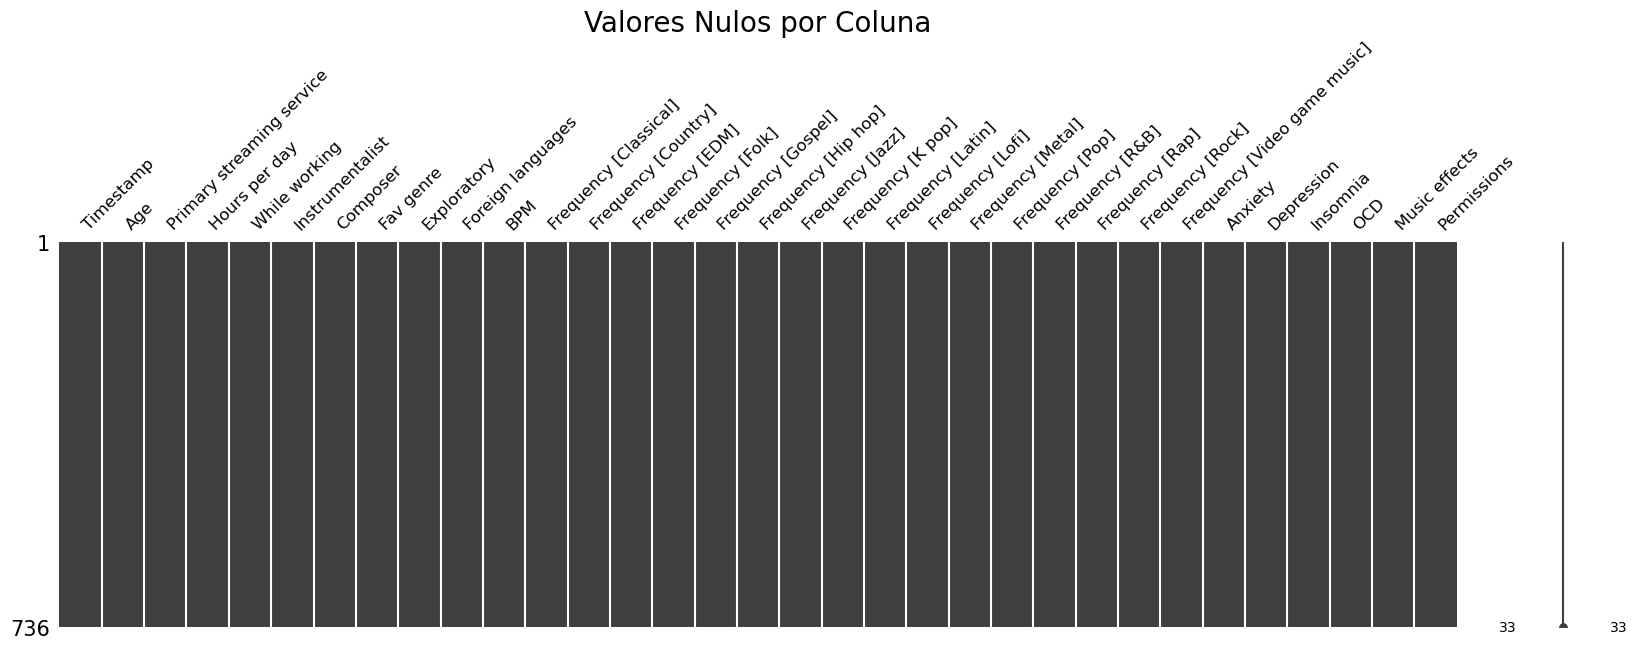

In [321]:
ax = msno.matrix(df, figsize=(20,5), fontsize=12)
ax.set_title("Valores Nulos por Coluna", fontsize=20)

In [322]:
df = jn.clean_names(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     736 non-null    object 
 1   age                           736 non-null    float64
 2   primary_streaming_service     736 non-null    object 
 3   hours_per_day                 736 non-null    float64
 4   while_working                 736 non-null    object 
 5   instrumentalist               736 non-null    object 
 6   composer                      736 non-null    object 
 7   fav_genre                     736 non-null    object 
 8   exploratory                   736 non-null    object 
 9   foreign_languages             736 non-null    object 
 10  bpm                           736 non-null    int64  
 11  frequency_[classical]         736 non-null    object 
 12  frequency_[country]           736 non-null    object 
 13  frequ

In [323]:
def remover_colchetes(df):
    df.columns = df.columns.str.replace(r'\[|\]', '', regex=True)
    return df

df = remover_colchetes(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   736 non-null    object 
 1   age                         736 non-null    float64
 2   primary_streaming_service   736 non-null    object 
 3   hours_per_day               736 non-null    float64
 4   while_working               736 non-null    object 
 5   instrumentalist             736 non-null    object 
 6   composer                    736 non-null    object 
 7   fav_genre                   736 non-null    object 
 8   exploratory                 736 non-null    object 
 9   foreign_languages           736 non-null    object 
 10  bpm                         736 non-null    int64  
 11  frequency_classical         736 non-null    object 
 12  frequency_country           736 non-null    object 
 13  frequency_edm               736 non

### Análise dos dados categóricos

In [324]:
df = df.drop(columns=[
    'timestamp',
    'permissions'
])

In [325]:
colunas_binarias = [
    'while_working',
    'instrumentalist',
    'composer',
    'exploratory',
    'foreign_languages'
]

In [326]:
def transformar_binario(df, colunas):
    for coluna in colunas:
        df[coluna] = df[coluna].map({'Yes':1, 'No':0})
    return df

In [327]:
df = transformar_binario(df, colunas_binarias)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         736 non-null    float64
 1   primary_streaming_service   736 non-null    object 
 2   hours_per_day               736 non-null    float64
 3   while_working               736 non-null    int64  
 4   instrumentalist             736 non-null    int64  
 5   composer                    736 non-null    int64  
 6   fav_genre                   736 non-null    object 
 7   exploratory                 736 non-null    int64  
 8   foreign_languages           736 non-null    int64  
 9   bpm                         736 non-null    int64  
 10  frequency_classical         736 non-null    object 
 11  frequency_country           736 non-null    object 
 12  frequency_edm               736 non-null    object 
 13  frequency_folk              736 non

In [328]:
df['primary_streaming_service'].value_counts() # TODO: remover essa variavel categorica

primary_streaming_service
Spotify                              459
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64

In [332]:
df['fav_genre'].value_counts() # TODO: remover essa variavel categorica

fav_genre
Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: count, dtype: int64

In [335]:
df['frequency_classical'].value_counts() # TODO: remover essa variavel categorica

frequency_classical
Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: count, dtype: int64

In [336]:
df['frequency_country'].value_counts() # TODO: remover essa variavel categorica

frequency_country
Never              343
Rarely             233
Sometimes          111
Very frequently     49
Name: count, dtype: int64

In [337]:
df['frequency_edm'].value_counts() # TODO: remover essa variavel categorica

frequency_edm
Never              307
Rarely             194
Sometimes          146
Very frequently     89
Name: count, dtype: int64

In [338]:
df['frequency_folk'].value_counts() # TODO: remover essa variavel categorica

frequency_folk
Never              292
Rarely             221
Sometimes          145
Very frequently     78
Name: count, dtype: int64

In [339]:
df['frequency_gospel'].value_counts() # TODO: remover essa variavel categorica

frequency_gospel
Never              535
Rarely             135
Sometimes           52
Very frequently     14
Name: count, dtype: int64

In [340]:
df['frequency_hip_hop'].value_counts() # TODO: remover essa variavel categorica

frequency_hip_hop
Sometimes          218
Rarely             214
Never              181
Very frequently    123
Name: count, dtype: int64

In [341]:
df['frequency_jazz'].value_counts() # TODO: remover essa variavel categorica

frequency_jazz
Never              261
Rarely             247
Sometimes          175
Very frequently     53
Name: count, dtype: int64

In [342]:
df['frequency_k_pop'].value_counts() # TODO: remover essa variavel categorica

frequency_k_pop
Never              416
Rarely             176
Very frequently     77
Sometimes           67
Name: count, dtype: int64

In [343]:
df['frequency_latin'].value_counts() # TODO: remover essa variavel categorica

frequency_latin
Never              443
Rarely             172
Sometimes           88
Very frequently     33
Name: count, dtype: int64

In [344]:
df['frequency_lofi'].value_counts() # TODO: remover essa variavel categorica

frequency_lofi
Never              280
Rarely             211
Sometimes          160
Very frequently     85
Name: count, dtype: int64

In [345]:
df['frequency_metal'].value_counts() # TODO: remover essa variavel categorica

frequency_metal
Never              264
Rarely             192
Very frequently    146
Sometimes          134
Name: count, dtype: int64

In [346]:
df['frequency_pop'].value_counts() # TODO: remover essa variavel categorica

frequency_pop
Very frequently    277
Sometimes          261
Rarely             142
Never               56
Name: count, dtype: int64

In [347]:
df['frequency_r&b'].value_counts() # TODO: remover essa variavel categorica

frequency_r&b
Never              225
Rarely             211
Sometimes          184
Very frequently    116
Name: count, dtype: int64

In [348]:
df['frequency_rap'].value_counts() # TODO: remover essa variavel categorica

frequency_rap
Rarely             215
Never              200
Sometimes          195
Very frequently    126
Name: count, dtype: int64

In [349]:
df['frequency_rock'].value_counts() # TODO: remover essa variavel categorica

frequency_rock
Very frequently    330
Sometimes          219
Rarely              96
Never               91
Name: count, dtype: int64

In [350]:
df['frequency_video_game_music'].value_counts() # TODO: remover essa variavel categorica

frequency_video_game_music
Never              236
Rarely             197
Sometimes          186
Very frequently    117
Name: count, dtype: int64

In [351]:
df['music_effects'].value_counts() #

music_effects
Improve      550
No effect    169
Worsen        17
Name: count, dtype: int64